# Data Exploration and Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from instools import utils

In [2]:
ins = pd.read_csv("data/insurance.csv")
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
ins_enc = utils.label_encoder(ins, ['sex', 'smoker', 'region'])
ins_enc
#sex: 0 = female, 1 = male
# smoker or not: 0 = no, 1 = yes
#region: 0 = northeast, 1 = northwest, 2 = southeast, 3 = southwest

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


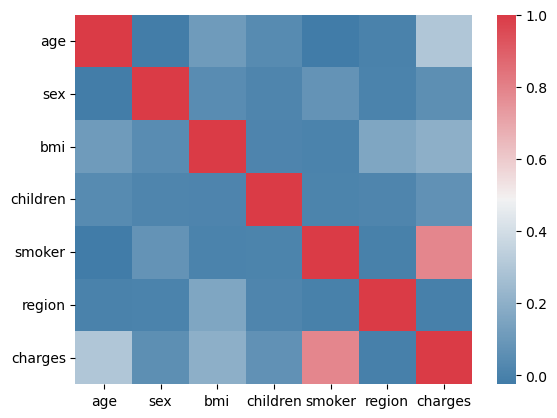

In [4]:
sns.heatmap(ins_enc.corr(), cmap=sns.diverging_palette(240,10,as_cmap=True));
plt.savefig('figures/heatmap.png');

Here, we see that smoker is very highly correlated with charges. It's followed slightly by bmi and age.

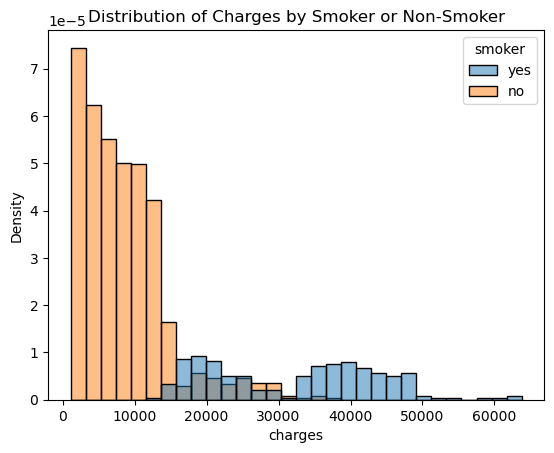

In [5]:
sns.histplot(data=ins, x='charges', hue='smoker', stat='density')
plt.title('Distribution of Charges by Smoker or Non-Smoker');
plt.savefig('figures/charges_by_smoker.png');

Here, we see that smokers tend to be charged way more than non smokers.

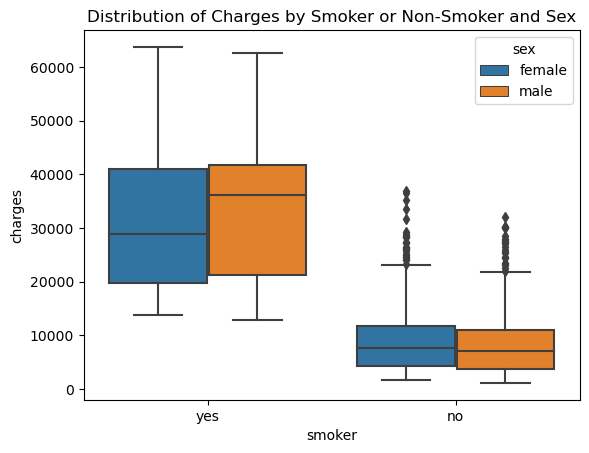

In [6]:
sns.boxplot(data=ins, y='charges', x='smoker', hue='sex');
plt.title('Distribution of Charges by Smoker or Non-Smoker and Sex');
plt.savefig('figures/charges_by_smoker_sex.png');

Here, we see that among male smokers, the charges are a lot higher than female smokers. On the other hand, male and female non-smokers are charged roughly the same, but females just slightly more.

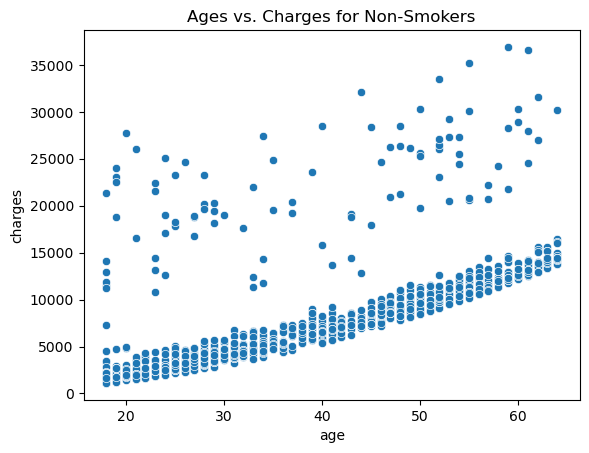

In [7]:
sns.scatterplot(data=ins[ins['smoker'] == 'no'], x='age', y='charges')
plt.title('Ages vs. Charges for Non-Smokers');
plt.savefig('figures/nonsmoker_age.png');

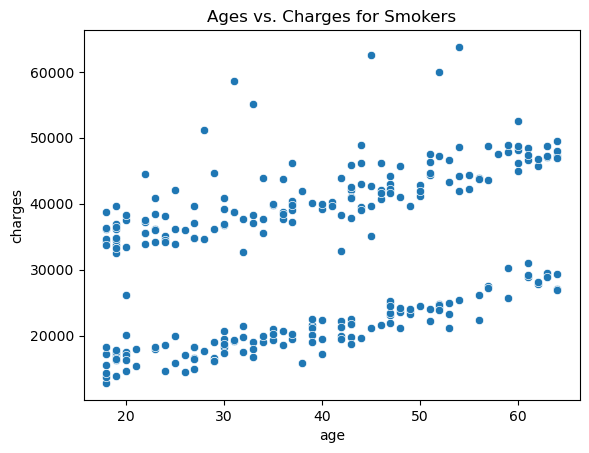

In [8]:
sns.scatterplot(data=ins[ins['smoker'] == 'yes'], x='age', y='charges')
plt.title('Ages vs. Charges for Smokers');
plt.savefig('figures/smoker_age.png');

For non-smokers, it looks like the charges increase with age. However, for smokers, it looks like there isn't as strong of a trend.

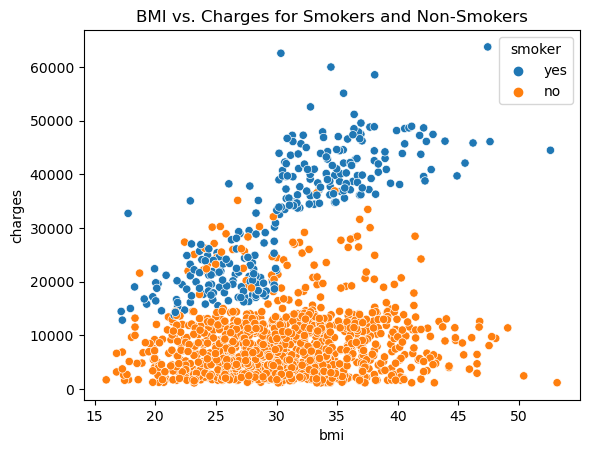

In [9]:
sns.scatterplot(data=ins, x='bmi', y='charges', hue='smoker')
plt.title('BMI vs. Charges for Smokers and Non-Smokers');
plt.savefig('figures/bmi.png');

It looks like there's a trend of smokers with a high BMI being charged more than non-smokers.